# Covid-19 data analysis for the Netherland

In [ ]:
%run ./data/data.ipynb

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,10
import seaborn as sns
#import tabula

Pulling data from sources.json:
(Source: CBS)  deceased @ https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=70895ned&_theme=76
(Source: CBS)  population @ https://opendata.cbs.nl/statline/portal.html?_catalog=CBS&_la=nl&tableId=37230ned&_theme=76
(Source: RIVM)  counts_per_municipality @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/5f6bc429-1596-490e-8618-1ed8fd768427
(Source: RIVM)  prevalence @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/097155aa-75eb-4caa-8ed3-4c6edb80467e
(Source: RIVM)  r @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/ed0699d1-c9d5-4436-8517-27eb993eab6e
(Source: RIVM)  homes_for_elderly @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/0179dd26-7bf6-4021-857f-8623aaf8e73a
(Source: RIVM)  homes_for_disabled @ https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/aa28b74d-7150-47bc-a7cb-98876e93381b
(Source: RIVM)  seventy_plus_living_at_home @ https://da

In [2]:
# defining function for calculating percentage
def percentage(df, d, n):
    name = '%_'+d+'_OF_'+n
    df[name] = df[d]/df[n]*100
    df[name].replace(np.nan, 0, inplace=True)

def moving_average(df, n, p):
    name = 'mva_'+n
    windows = df[n].rolling(p)
    positive_tests[name] = windows.mean()

def running_total(df, n):
    name = 'rt_'+n
    df[name] = np.cumsum(df[n])

In [3]:
def bandwidth(df,s,t=None):
    print(df)
    print(s)
    print(t)
#deceased
#bandwidth(deceased, 'Overledenen_1', 'LeeftijdOp31December')

### deceased
- flow per week:
  - recent years vs. 2020
  - average +- std.dev over this year/last year/last 2 years/5 years
- flow per weekcorona data ()

## Comparing deaths

In [4]:
deaths = per_week[['Deceased','Deceased_covid']]
deaths['Deceased_other'] = deaths['Deceased'] - deaths['Deceased_covid']

# calculate stastics
deaths['mean'] = deaths['Deceased'].mean()
deaths['stddev'] = deaths['Deceased'].std()
deaths['+z'] = deaths['mean']+deaths['stddev']
deaths['-z'] = deaths['mean']-deaths['stddev']
# calculate rolling stastics
deaths['mean_rolling'] = deaths['Deceased'].rolling(window=260).mean()
deaths['stddev_rolling'] = deaths['Deceased'].rolling(window=260).std()
deaths['+z_rolling'] = deaths['mean_rolling']+deaths['stddev_rolling']
deaths['-z_rolling'] = deaths['mean_rolling']-deaths['stddev_rolling']

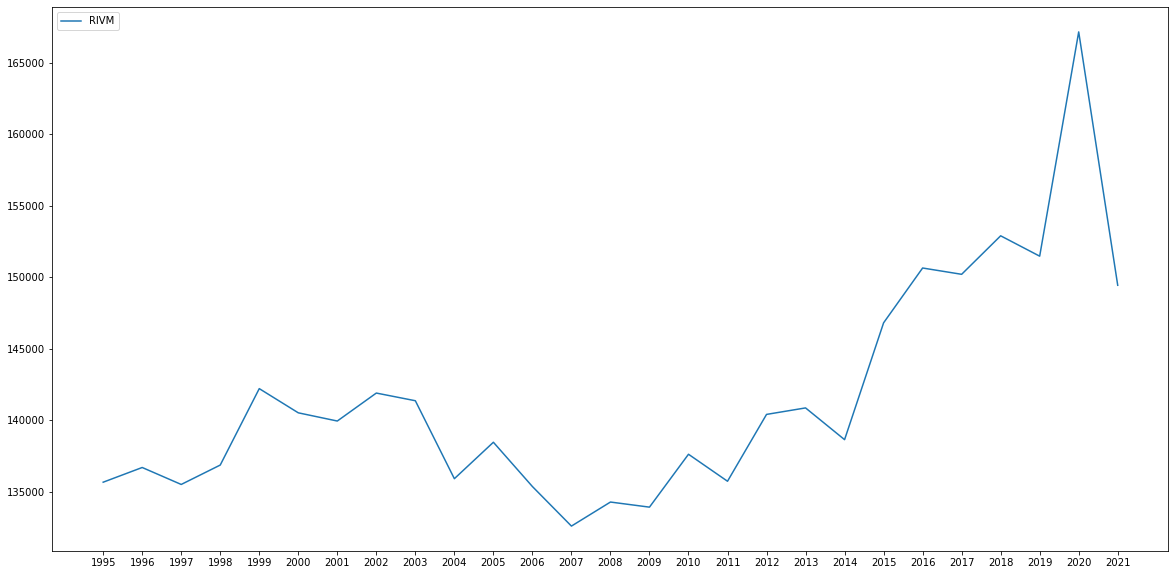

In [5]:
total = deaths.groupby(by='year').sum()
week = deceased_per_week.groupby(by='year').sum()

plt.plot(total.index.astype(str), total.Deceased, label='RIVM')
#plt.plot(deceased_per_year.index.astype(str), deceased_per_year.Deceased, label='CBS')
#plt.plot(week.index.astype(str), week.Deceased, label='CBS, week',linestyle='--')
plt.legend(loc='upper left')
plt.show()

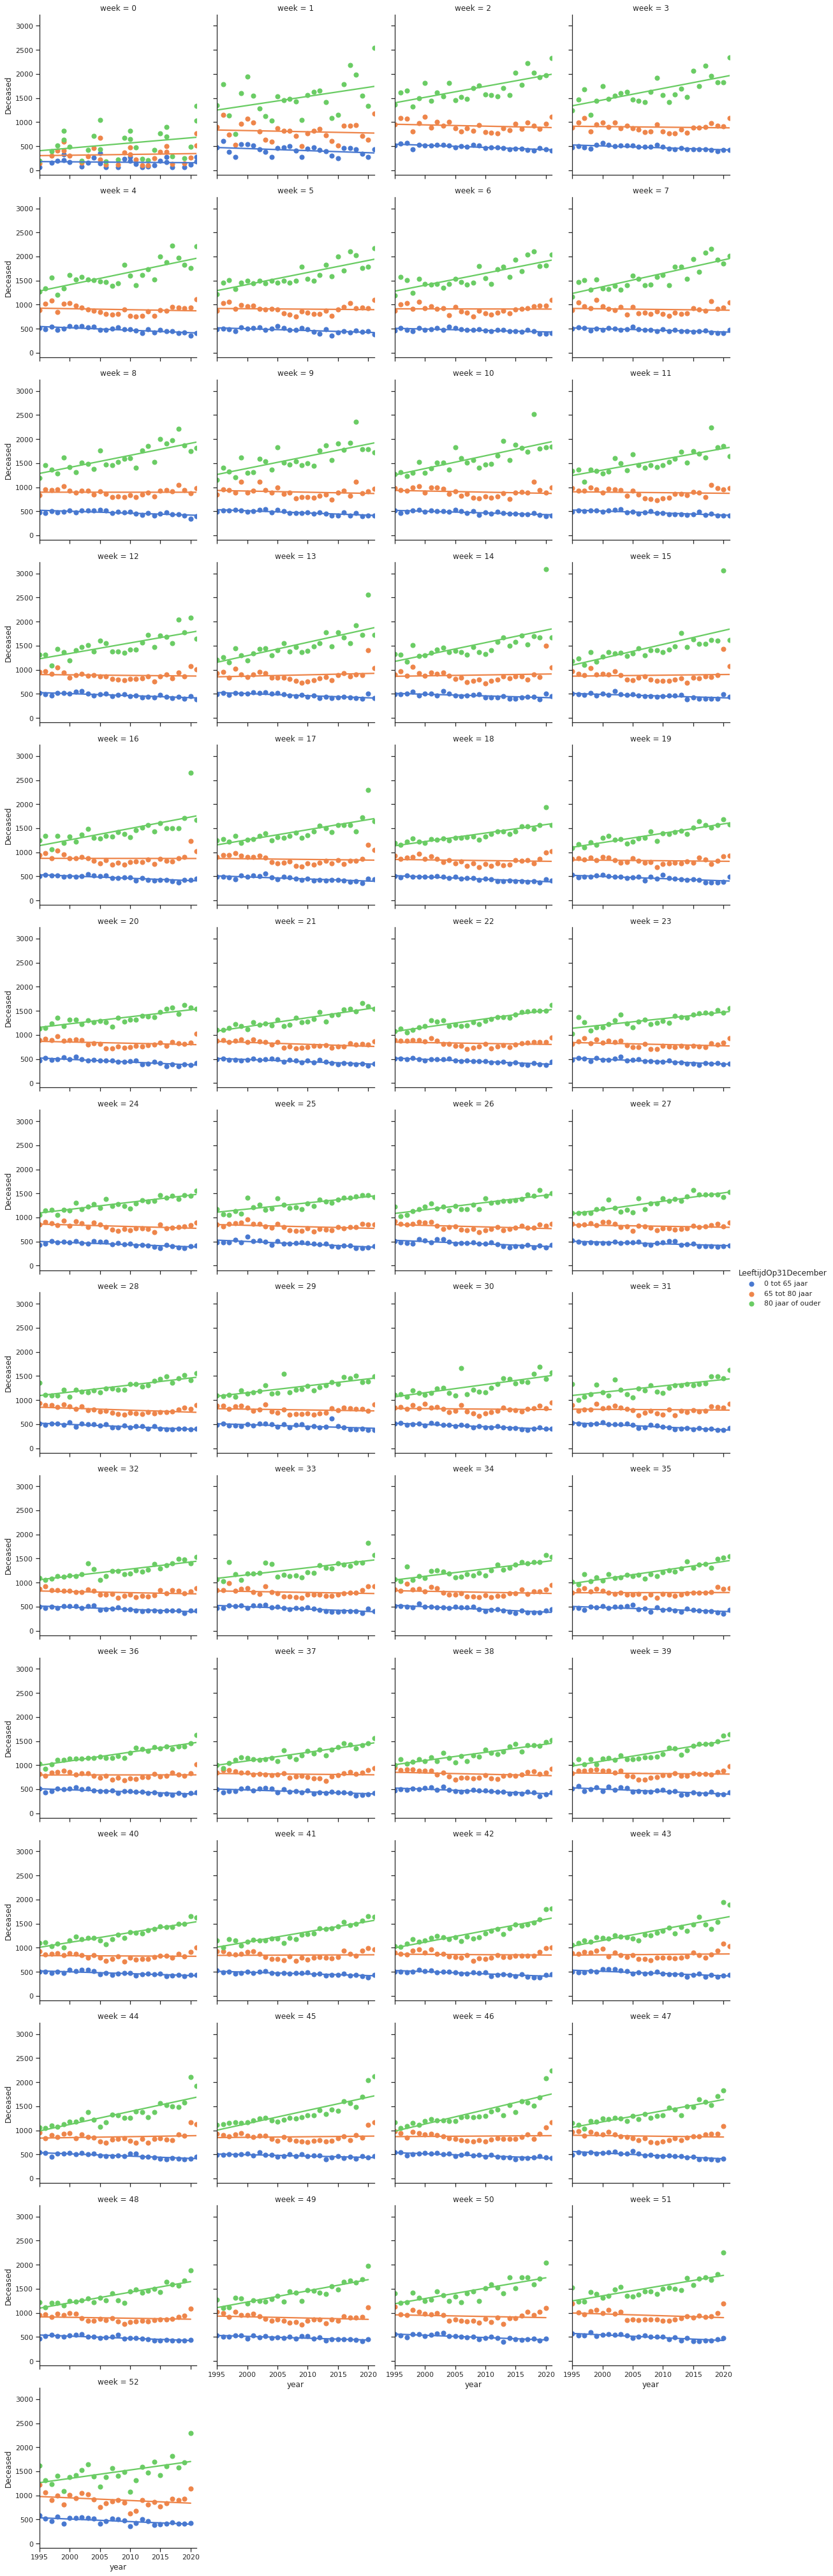

In [6]:
#%matplotlib widget
# set data
deaths['indexx'] = deaths.index.to_numpy()
deaths['rolling'] = deaths.Deceased.rolling(window=4).mean()

sns.set_theme(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="year", y="Deceased", col="week", hue="LeeftijdOp31December", data=deceased_week_agegroup.reset_index(),
           col_wrap=4, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

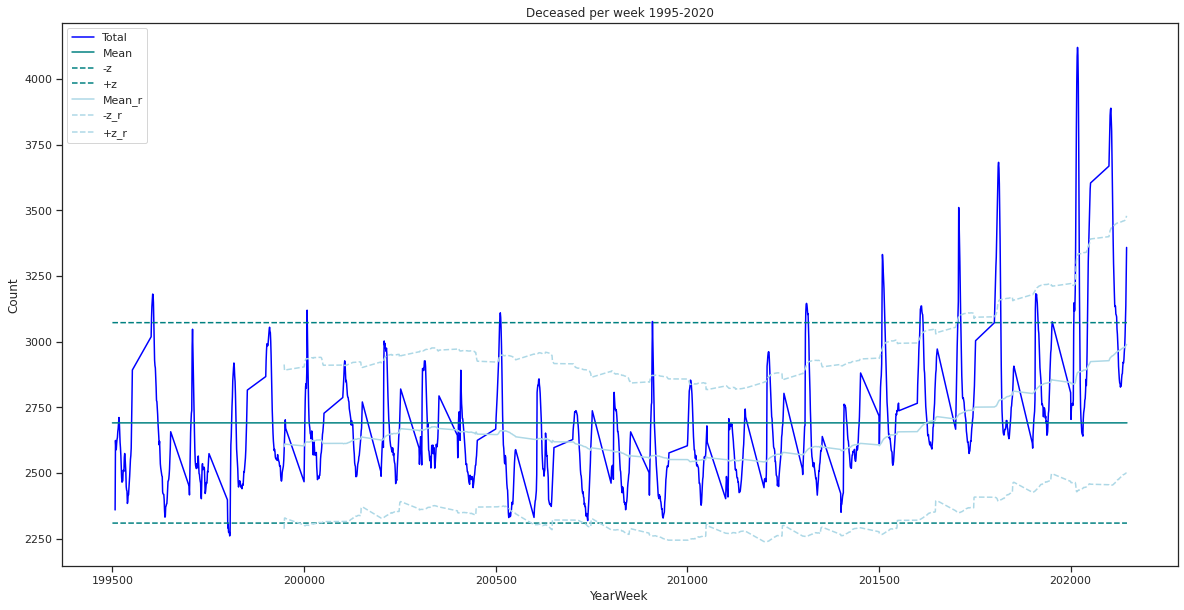

In [7]:
#%matplotlib widget
# set data
x_tot = deaths.reset_index()['year']*100+deaths.reset_index()['week']
y_tot = deaths.Deceased.rolling(window=8).mean()
y_cov = deaths.Deceased_covid.rolling(window=4).mean()
y_oth = deaths.Deceased_other.rolling(window=4).mean()
mean = deaths['mean']
m_37 = deaths['-z']
m_62 = deaths['+z']
mean_rolling = deaths['mean_rolling']
m_37_rolling = deaths['-z_rolling']
m_62_rolling = deaths['+z_rolling']

# set plot
plt.plot(x_tot, y_tot, label='Total', color='blue')
plt.plot(x_tot, mean, label='Mean', color='teal', linestyle='-')
plt.plot(x_tot, m_37, label='-z', color='teal', linestyle='--')
plt.plot(x_tot, m_62, label='+z', color='teal', linestyle='--')
plt.plot(x_tot, mean_rolling, label='Mean_r', color='lightblue', linestyle='-')
plt.plot(x_tot, m_37_rolling, label='-z_r', color='lightblue', linestyle='--')
plt.plot(x_tot, m_62_rolling, label='+z_r', color='lightblue', linestyle='--')
#plt.plot(x_tot, y_cov, label='Covid')
#plt.plot(x_tot, y_oth, label='other', color='y')

plt.title('Deceased per week 1995-2020')
plt.xlabel('YearWeek')
plt.ylabel('Count')
plt.legend(loc='upper left')

# show plot
plt.show()

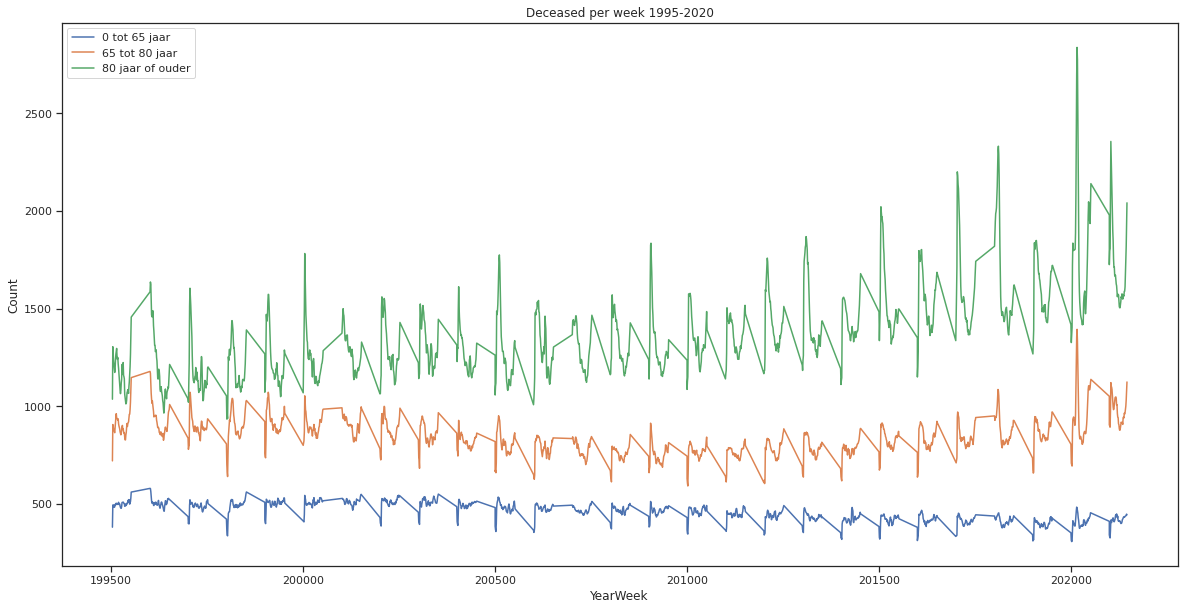

In [8]:
#%matplotlib widget
# set data
x_ = deceased_week_agegroup[deceased_week_agegroup['LeeftijdOp31December'] == '0 tot 65 jaar'].reset_index()['year']*100+deceased_week_agegroup[deceased_week_agegroup['LeeftijdOp31December'] == '0 tot 65 jaar'].reset_index()['week']
y_0 = deceased_week_agegroup.Deceased[deceased_week_agegroup['LeeftijdOp31December'] == '0 tot 65 jaar'].rolling(window=4).mean()
y_65 = deceased_week_agegroup.Deceased[deceased_week_agegroup['LeeftijdOp31December'] == '65 tot 80 jaar'].rolling(window=4).mean()
y_80 = deceased_week_agegroup.Deceased[deceased_week_agegroup['LeeftijdOp31December'] == '80 jaar of ouder'].rolling(window=4).mean()

# set plot
plt.plot(x_, y_0, label='0 tot 65 jaar')
plt.plot(x_, y_65, label='65 tot 80 jaar')
plt.plot(x_, y_80, label='80 jaar of ouder')

plt.title('Deceased per week 1995-2020')
plt.xlabel('YearWeek')
plt.ylabel('Count')
plt.legend(loc='upper left')

# show plot
plt.show()

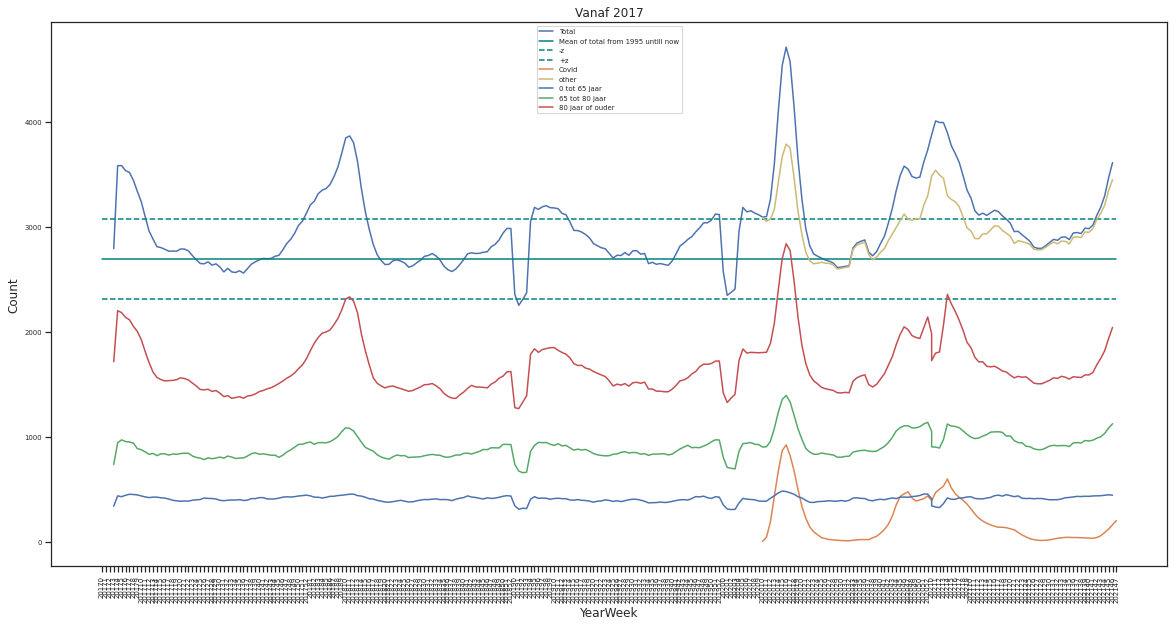

In [9]:
#%matplotlib widget
asof = 2017
deceased_2020_tot = deaths.loc[asof:].reset_index()
# set data
x_tot = deceased_2020_tot['year'].astype(str)+deceased_2020_tot['week'].astype(str)
y_tot = deceased_2020_tot.Deceased.rolling(window=4).mean()
y_cov = deceased_2020_tot.Deceased_covid.rolling(window=4).mean()
y_oth = deceased_2020_tot.Deceased_other.rolling(window=4).mean()
mean = deceased_2020_tot['mean']
m_37 = deceased_2020_tot['-z']
m_62 = deceased_2020_tot['+z']

deceased_2020 = deceased_week_agegroup.reset_index()
deceased_2020 = deceased_2020[deceased_2020['year'] >= asof]

x_ = deceased_2020[deceased_2020['LeeftijdOp31December'] == '0 tot 65 jaar'].year.astype(str)+deceased_2020[deceased_2020['LeeftijdOp31December'] == '0 tot 65 jaar'].week.astype(str)
y_0 = deceased_2020.Deceased[deceased_2020['LeeftijdOp31December'] == '0 tot 65 jaar'].rolling(window=4).mean()
y_65 = deceased_2020.Deceased[deceased_2020['LeeftijdOp31December'] == '65 tot 80 jaar'].rolling(window=4).mean()
y_80 = deceased_2020.Deceased[deceased_2020['LeeftijdOp31December'] == '80 jaar of ouder'].rolling(window=4).mean()

# set plot
plt.plot(x_tot, y_tot, label='Total')
plt.plot(x_tot, mean, label='Mean of total from 1995 untill now', color='teal', linestyle='-')
plt.plot(x_tot, m_37, label='-z', color='teal', linestyle='--')
plt.plot(x_tot, m_62, label='+z', color='teal', linestyle='--')
plt.plot(x_tot, y_cov, label='Covid')
plt.plot(x_tot, y_oth, label='other', color='y')
plt.plot(x_, y_0, color='b', label='0 tot 65 jaar')
plt.plot(x_, y_65, label='65 tot 80 jaar')
plt.plot(x_, y_80, label='80 jaar of ouder')

plt.title('Vanaf '+str(asof))
plt.xlabel('YearWeek')
plt.xticks(rotation=90)
plt.tick_params(labelsize = 'xx-small')
plt.ylabel('Count')
plt.legend(loc='upper center', fontsize='xx-small')

# show plot
plt.show()

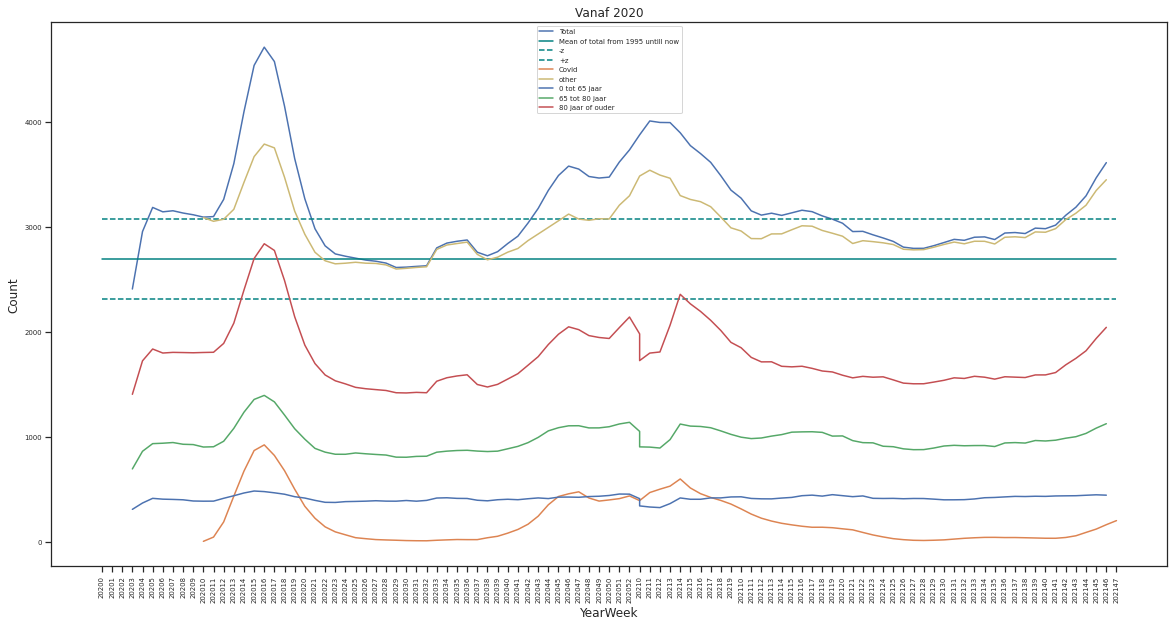

In [10]:
#%matplotlib widget
asof = 2020
deceased_2020_tot = deaths.loc[asof:].reset_index()
# set data
x_tot = deceased_2020_tot['year'].astype(str)+deceased_2020_tot['week'].astype(str)
y_tot = deceased_2020_tot.Deceased.rolling(window=4).mean()
y_cov = deceased_2020_tot.Deceased_covid.rolling(window=4).mean()
y_oth = deceased_2020_tot.Deceased_other.rolling(window=4).mean()
mean = deceased_2020_tot['mean']
m_37 = deceased_2020_tot['-z']
m_62 = deceased_2020_tot['+z']

deceased_2020 = deceased_week_agegroup.reset_index()
deceased_2020 = deceased_2020[deceased_2020['year'] >= asof]

x_ = deceased_2020[deceased_2020['LeeftijdOp31December'] == '0 tot 65 jaar'].year.astype(str)+deceased_2020[deceased_2020['LeeftijdOp31December'] == '0 tot 65 jaar'].week.astype(str)
y_0 = deceased_2020.Deceased[deceased_2020['LeeftijdOp31December'] == '0 tot 65 jaar'].rolling(window=4).mean()
y_65 = deceased_2020.Deceased[deceased_2020['LeeftijdOp31December'] == '65 tot 80 jaar'].rolling(window=4).mean()
y_80 = deceased_2020.Deceased[deceased_2020['LeeftijdOp31December'] == '80 jaar of ouder'].rolling(window=4).mean()

# set plot
plt.plot(x_tot, y_tot, label='Total')
plt.plot(x_tot, mean, label='Mean of total from 1995 untill now', color='teal', linestyle='-')
plt.plot(x_tot, m_37, label='-z', color='teal', linestyle='--')
plt.plot(x_tot, m_62, label='+z', color='teal', linestyle='--')
plt.plot(x_tot, y_cov, label='Covid')
plt.plot(x_tot, y_oth, label='other', color='y')
plt.plot(x_, y_0, color='b', label='0 tot 65 jaar')
plt.plot(x_, y_65, label='65 tot 80 jaar')
plt.plot(x_, y_80, label='80 jaar of ouder')

plt.title('Vanaf '+str(asof))
plt.xlabel('YearWeek')
plt.xticks(rotation=90)
plt.tick_params(labelsize = 'xx-small')
plt.ylabel('Count')
plt.legend(loc='upper center', fontsize='xx-small')

# show plot
plt.show()

<AxesSubplot:>

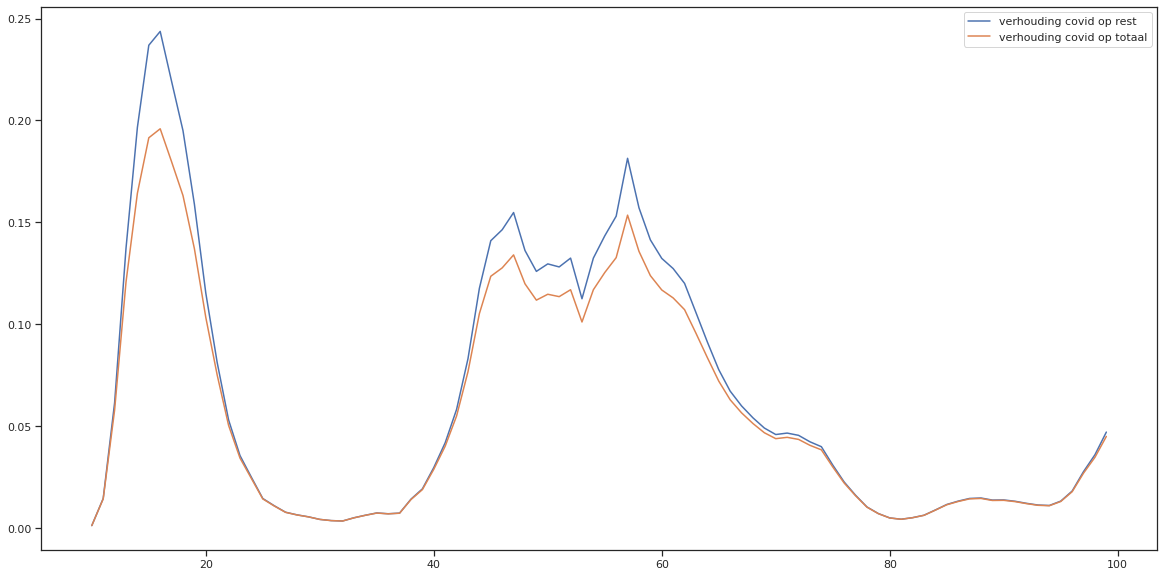

In [11]:
verhouding_covid = pd.DataFrame()
verhouding_covid['verhouding covid op rest'] = y_cov / y_oth
verhouding_covid['verhouding covid op totaal'] = y_cov / y_tot
verhouding_covid.plot()

In [12]:
df = deaths.reset_index()
df = df.groupby('year').mean()
df = df['Deceased']
deceased_extra = deaths.reset_index().merge(df, on='year', how='outer', suffixes=['','_mean_y'])
df = deaths
df = df.groupby('year').std()
df = df['Deceased']
deceased_extra = deceased_extra.merge(df, on='year', how='outer', suffixes=['','_std_y'])
deceased_extra['Deceased-37'] = deceased_extra['Deceased_mean_y']-deceased_extra['Deceased_std_y']
deceased_extra['Deceased+62'] = deceased_extra['Deceased_mean_y']+deceased_extra['Deceased_std_y']
#deceased_extra

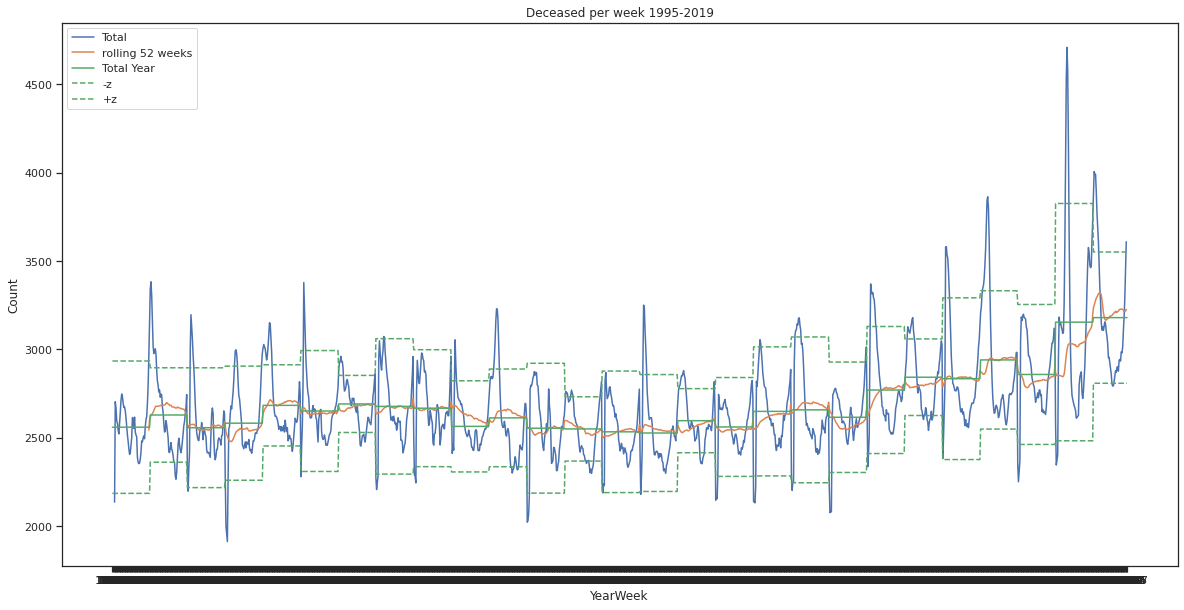

In [13]:
#%matplotlib widget
# set data
deceased_hist = deceased_extra#[deceased_extra.year >= 2020]

x_tot = deceased_hist.year.astype(str)+deceased_hist.week.astype(str)
y_tot = deceased_hist.Deceased.rolling(window=4).mean()
y_jaar = deceased_hist.Deceased.rolling(window=52).mean()
y_ = deceased_hist.Deceased_mean_y
m_37 = deceased_hist['Deceased-37']
m_62 = deceased_hist['Deceased+62']

# set plot
plt.plot(x_tot, y_tot, label='Total')
plt.plot(x_tot, y_jaar, label='rolling 52 weeks')
plt.plot(x_tot, y_, color='g', linestyle='-', label='Total Year')
plt.plot(x_tot, m_37, color='g', linestyle='--', label='-z')
plt.plot(x_tot, m_62, color='g', linestyle='--', label='+z')

plt.title('Deceased per week 1995-2019')
plt.xlabel('YearWeek')
plt.ylabel('Count')
plt.legend()

# show plot
plt.show()

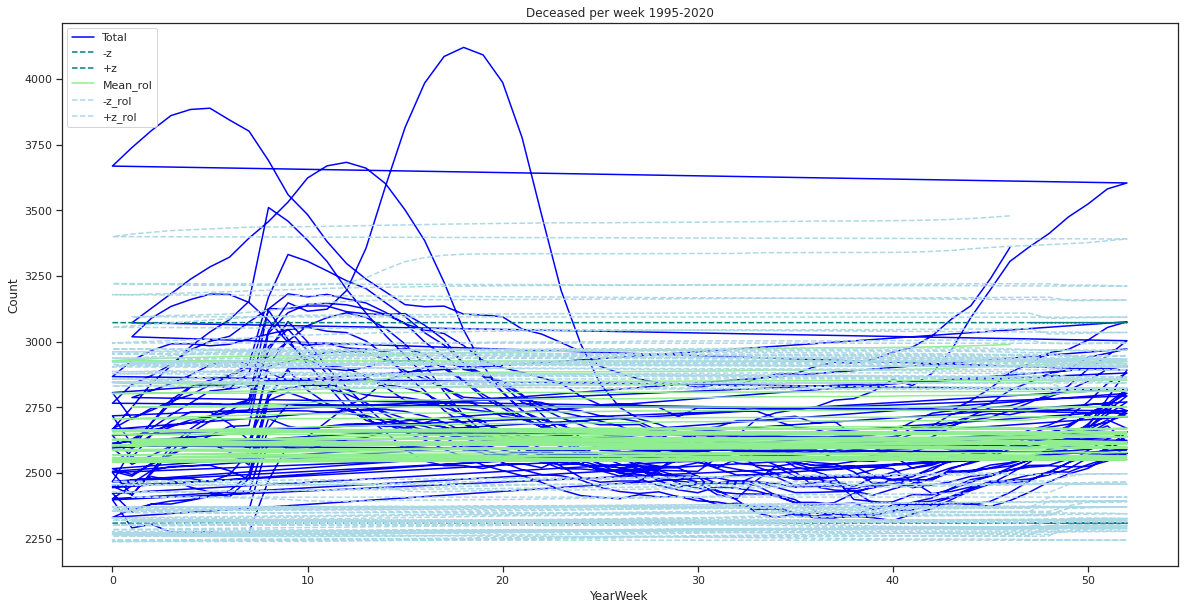

In [18]:
#%matplotlib widget
# set data
x_tot = deaths.reset_index()['week']
y_tot = deaths.Deceased.rolling(window=8).mean()
m_37 = deaths['-z']
m_62 = deaths['+z']
mean_rolling = deaths['mean_rolling']
m_37_rolling = deaths['-z_rolling']
m_62_rolling = deaths['+z_rolling']

# set plot
plt.plot(x_tot, y_tot, label='Total', color='blue')
#plt.plot(x_tot, mean, label='Mean', color='teal', linestyle='-')
plt.plot(x_tot, m_37, label='-z', color='teal', linestyle='--')
plt.plot(x_tot, m_62, label='+z', color='teal', linestyle='--')
plt.plot(x_tot, mean_rolling, label='Mean_rol', color='lightgreen', linestyle='-')
plt.plot(x_tot, m_37_rolling, label='-z_rol', color='lightblue', linestyle='--')
plt.plot(x_tot, m_62_rolling, label='+z_rol', color='lightblue', linestyle='--')

plt.title('Deceased per week 1995-2020')
plt.xlabel('YearWeek')
plt.ylabel('Count')
plt.legend(loc='upper left')

# show plot
plt.show()

<AxesSubplot:xlabel='year,week'>

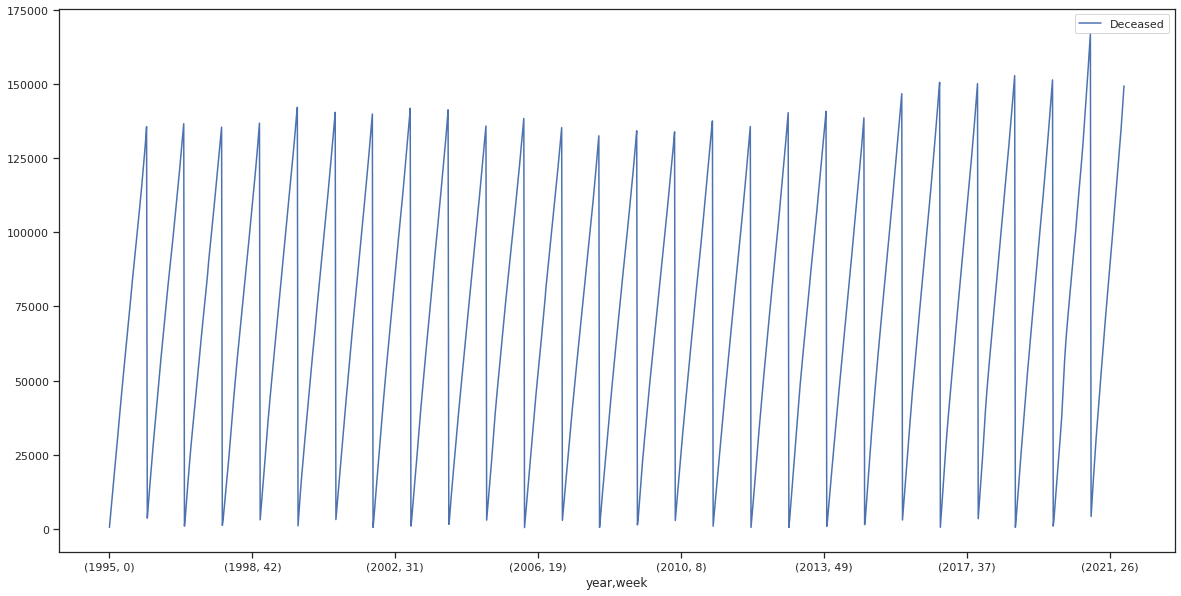

In [19]:
deceased_year = deaths.groupby('year').cumsum()
deceased_year = deceased_year[['Deceased']]
deceased_year.plot()

In [20]:
deaths

Deceased  Deceased_covid  Deceased_other        mean      stddev  \
year week                                                                     
1995 0        394.0             NaN             NaN  2690.59254  381.462422   
     1       2719.0             NaN             NaN  2690.59254  381.462422   
     2       2823.0             NaN             NaN  2690.59254  381.462422   
     3       2609.0             NaN             NaN  2690.59254  381.462422   
     4       2664.0             NaN             NaN  2690.59254  381.462422   
...             ...             ...             ...         ...         ...   
2021 43      3372.0            97.0          3275.0  2690.59254  381.462422   
     44      3494.0           150.0          3344.0  2690.59254  381.462422   
     45      3733.0           170.0          3563.0  2690.59254  381.462422   
     46      3837.0           234.0          3603.0  2690.59254  381.462422   
     47         NaN           252.0             NaN  2690.59254  381.462422   

                    +z           -z  mean_rolling  stddev_rolling  \
year week                                                           
1995 0     3072.054963  2309.130118           NaN             NaN   
     1     3072.054963  2309.130118           NaN             NaN   
     2     3072.054963  2309.130118           NaN             NaN   
     3     3072.054963  2309.130118           NaN             NaN   
     4     3072.054963  2309.130118           NaN             NaN   
...                ...          ...           ...             ...   
2021 43    3072.054963  2309.130118   2981.561538      483.574001   
     44    3072.054963  2309.130118   2983.657692      484.612405   
     45    3072.054963  2309.130118   2986.315385      486.823334   
     46    3072.054963  2309.130118   2989.038462      489.596752   
     47    3072.054963  2309.130118           NaN             NaN   

            +z_rolling   -z_rolling      indexx  rolling  
year week                                                 
1995 0             NaN          NaN   (1995, 0)      NaN  
     1             NaN          NaN   (1995, 1)      NaN  
     2             NaN          NaN   (1995, 2)      NaN  
     3             NaN          NaN   (1995, 3)  2136.25  
     4             NaN          NaN   (1995, 4)  2703.75  
...                ...          ...         ...      ...  
2021 43    3465.135540  2497.987537  (2021, 43)  3184.75  
     44    3468.270098  2499.045287  (2021, 44)  3293.00  
     45    3473.138718  2499.492051  (2021, 45)  3464.25  
     46    3478.635213  2499.441710  (2021, 46)  3609.00  
     47            NaN          NaN  (2021, 47)      NaN  

[1422 rows x 13 columns]

In [21]:
deceased_week = deceased_per_week
deceased_week.reset_index(inplace=True)
df = deaths.groupby('week').mean()
df = df['Deceased']
deceased_week = deceased_per_week.merge(df, on='week', how='outer', suffixes=['','_mean_w'])
df = deaths.groupby('week').std()
df = df['Deceased'] 
deceased_week = deceased_week.merge(df, on='week', how='outer', suffixes=['','_std_w'])
deceased_week['Deceased-37'] = deceased_week['Deceased_mean_w']-deceased_week['Deceased_std_w']
deceased_week['Deceased+62'] = deceased_week['Deceased_mean_w']+deceased_week['Deceased_std_w']
deceased_week['YW'] = deceased_week['year'] * 100 + deceased_week['week']
#deceased_week['year'] = deceased_week['YW']/100
deceased_week['year'] = deceased_week['year'].astype(int)
deceased_week

,year,week,Deceased,Deceased_mean_w,Deceased_std_w,Deceased-37,Deceased+62,YW
0,1995,0,394.0,1271.521739,1073.732186,197.789554,2345.253925,199500
1,1997,0,858.0,1271.521739,1073.732186,197.789554,2345.253925,199700
2,1998,0,1124.0,1271.521739,1073.732186,197.789554,2345.253925,199800
3,1999,0,2982.0,1271.521739,1073.732186,197.789554,2345.253925,199900
4,2000,0,956.0,1271.521739,1073.732186,197.789554,2345.253925,200000
...,...,...,...,...,...,...,...,...
1416,2016,52,2860.0,2862.846154,364.891841,2497.954313,3227.737995,201652
1417,2017,52,3187.0,2862.846154,364.891841,2497.954313,3227.737995,201752
1418,2018,52,2901.0,2862.846154,364.891841,2497.954313,3227.737995,201852
1419,2019,52,3028.0,2862.846154,364.891841,2497.954313,3227.737995,201952


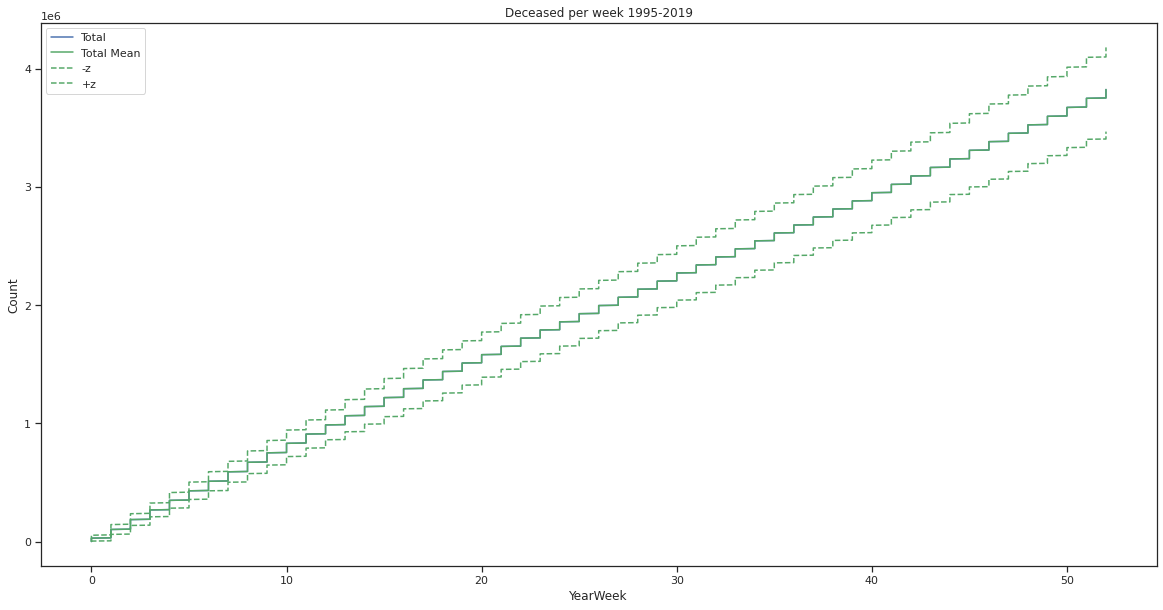

In [22]:
#%matplotlib widget
# set data
deceased_week_hist = deceased_week#[deceased_week.year == 2021]

x_tot = deceased_week_hist.week
y_tot = deceased_week_hist.Deceased.cumsum()
y_ = deceased_week_hist.Deceased_mean_w.cumsum()
m_37 = deceased_week_hist['Deceased-37'].cumsum()
m_62 = deceased_week_hist['Deceased+62'].cumsum()

# set plot
plt.plot(x_tot, y_tot, label='Total')
#plt.plot(x_tot, y_jaar, label='rolling 52 weeks')
plt.plot(x_tot, y_, color='g', linestyle='-', label='Total Mean')
plt.plot(x_tot, m_37, color='g', linestyle='--', label='-z')
plt.plot(x_tot, m_62, color='g', linestyle='--', label='+z')

plt.title('Deceased per week 1995-2019')
plt.xlabel('YearWeek')
plt.ylabel('Count')
plt.legend()

# show plot
plt.show()

In [23]:
deaths.corr()

,Deceased,Deceased_covid,Deceased_other,mean,stddev,+z,-z,mean_rolling,stddev_rolling,+z_rolling,-z_rolling,rolling
Deceased,1.000000,0.898306,0.940467,NaN,NaN,NaN,NaN,0.408066,0.401996,0.415801,0.356099,0.755992
Deceased_covid,0.898306,1.000000,0.695491,NaN,NaN,NaN,NaN,-0.254019,-0.150359,-0.215607,-0.317508,0.850447
Deceased_other,0.940467,0.695491,1.000000,NaN,NaN,NaN,NaN,-0.005554,-0.079452,-0.037261,0.111697,0.778155
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
stddev,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
+z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean_rolling,0.408066,-0.254019,-0.005554,NaN,NaN,NaN,NaN,1.000000,0.894077,0.989298,0.941281,0.519977
stddev_rolling,0.401996,-0.150359,-0.079452,NaN,NaN,NaN,NaN,0.894077,1.000000,0.949864,0.690351,0.524169
+z_rolling,0.415801,-0.215607,-0.037261,NaN,NaN,NaN,NaN,0.989298,0.949864,1.000000,0.881944,0.533720


# Deceased relative to population

In [24]:
print('Calculating percentage deceased of population')
percentage(population,'Deceased','Population')
percentage(population_y,'Deceased', 'Population')
print('DONE')

Calculating percentage deceased of population


NameError: name 'population_y' is not defined

In [25]:
print('Ceating dataframe for Nederland')
population_nl = population[population['RegioS'] == 'Nederland']
population = population[population['RegioS'] != 'Nederland']
population_y_nl = population_y[population_y['RegioS'] == 'Nederland']
population_y = population_y[population_y['RegioS'] != 'Nederland']
print('DONE')
population_y_nl

Ceating dataframe for Nederland


NameError: name 'population_y' is not defined

In [26]:
# add total for 2020 if missing
try:
    population_y_nl.loc[pd.Period("2020"),]
    print('2020 in dataframe: skipping')
except:
    print('2020 missing in dataframe: adding total from other dataframe')
    population_y_nl.loc[pd.Period("2020"),'year'] = "2020"
    population_y_nl.loc[pd.Period("2020"),'Deceased'] = deaths.loc[(2020,),'Deceased'].sum()
    population_y_nl['Born'] = population_nl['Born'].mean()
    born2020 = population_nl.loc["2020",'Born'].sum()/11/12
    population_y_nl.loc[pd.Period("2020"),'Population'] = born2020+population_y_nl.loc[pd.Period("2019"),'Population']
    percentage(population_y_nl,'Deceased','Population')
population_y_nl['%_Deceased_OF_Population_1']= population_y_nl['%_Deceased_OF_Population']*200000
#for year,born in population['year','Born']:
#    population.loc[year,'Born'] = born.mean()
#population_y_nl['Born'] = population_nl['Born'].mean()
population_y_nl

2020 missing in dataframe: adding total from other dataframe


NameError: name 'population_y_nl' is not defined

TypeError: no numeric data to plot

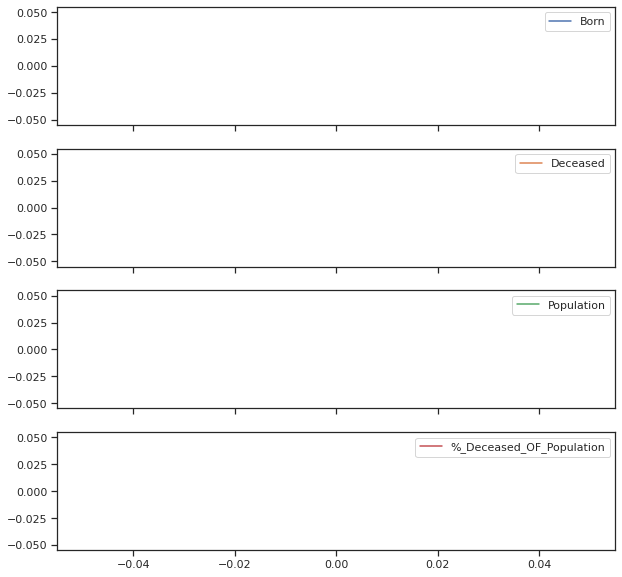

In [27]:
population_nl.plot(subplots=True,figsize=(10,10))
population_nl.pivot(index='month',columns='year', values='Deceased').plot(figsize=(10,5))
population_nl.pivot(index='month',columns='year',values='%_Deceased_OF_Population').plot(figsize=(10,))

In [ ]:
x=population_y_nl.index
print(x)
ax=population_y_nl.plot(kind='line', y='Deceased', color='DarkBlue',figsize=(10,5))
ax2=population_y_nl.plot(kind='line',y='%_Deceased_OF_Population', secondary_y=True,color='Red', ax=ax)
ax.set_ylabel('Deceased')
ax2.set_ylabel('% of population')
plt.tight_layout()
plt.show()

### and then reproducting the coronadashboard
The data I use is the sources used formhet Coronadashbord of the Dutch government. https://coronadashboard.rijksoverheid.nl/
  
This contains:
*medical indicators*

In [28]:
positive_tests.corr()

NameError: name 'positive_tests' is not defined

In [29]:
rivm_date_of_report = positive_tests.loc[0,'Date_of_report']
print('Date of report for RIVM positive tests data = ' + str(rivm_date_of_report))
positive_tests = positive_tests.drop(columns='Date_of_report')

NameError: name 'positive_tests' is not defined

In [30]:
# cumulatives
running_total(positive_tests, 'Total_reported')
running_total(positive_tests, 'Hospital_admission')
running_total(positive_tests, 'Deceased')

NameError: name 'positive_tests' is not defined

In [31]:
# percentages
percentage(positive_tests, 'rt_Deceased', 'rt_Total_reported')
percentage(positive_tests, 'rt_Deceased', 'rt_Hospital_admission')
percentage(positive_tests, 'rt_Hospital_admission', 'rt_Total_reported')

NameError: name 'positive_tests' is not defined

In [32]:
pfr = positive_tests.loc[positive_tests.index.argmax(),'%_rt_Deceased_OF_rt_Total_reported']
hfr = positive_tests.loc[positive_tests.index.argmax(),'%_rt_Deceased_OF_rt_Hospital_admission']
print('pfr on '+rivm_date_of_report+ 'is '+str(pfr)+'%')
print('hfr on '+rivm_date_of_report+ 'is '+str(hfr)+'%')

NameError: name 'positive_tests' is not defined

In [33]:
positive_tests.plot(figsize=(20,20),subplots=True)
positive_tests.plot(y=['Total_reported', 'Hospital_admission', 'Deceased'], figsize=(20, 10))
positive_tests.plot(y=['rt_Total_reported', 'rt_Hospital_admission', 'rt_Deceased'], figsize=(20, 10))
positive_tests.plot(y=['%_rt_Deceased_OF_rt_Total_reported', '%_rt_Deceased_OF_rt_Hospital_admission', '%_rt_Hospital_admission_OF_rt_Total_reported'], figsize=(20, 10))

NameError: name 'positive_tests' is not defined

In [34]:
positive_tests = positive_tests.set_index(pd.PeriodIndex(positive_tests['Date_of_publication'], freq='d'))
positive_tests = positive_tests.drop(columns='Date_of_publication')
positive_tests['P'] = positive_tests.index.strftime('%Y-%m')
positive_tests = positive_tests.rename(index={'Date_of_publication':'date'})
positive_tests

NameError: name 'positive_tests' is not defined

In [35]:
positive_tests_nl = positive_tests.sum(level='Date_of_publication')
positive_tests_nl['P'] = positive_tests_nl.index.strftime('%Y-%m')
positive_tests_nl

NameError: name 'positive_tests' is not defined

In [36]:
pop_latest = population_nl.loc[population_nl['P'].max(),'Population']
pop_latest

KeyError: 'P'

In [37]:
print(type(population_nl.P[0]))
print(type(positive_tests_nl.P[0]))

pd.merge_asof(positive_tests_nl,population_nl,left_on='P',right_on='P')

AttributeError: 'DataFrame' object has no attribute 'P'

# Gemiddeld aantal positief geteste mensen per 100.000 inwoners
## Dit getal laat zien van hoeveel mensen gisteren per 100.000 inwoners gemeld is dat ze positief getest zijn en COVID-19 hebben.
positive_tests_nl['p100k'] = positive_tests_nl['Total_reported'] / population_nl.loc[if(positive_tests_nl['P'] > population_nl['P'].max()):
                                                                                     population_nl.loc[positive_tests_nl['P'],'Population']
                                                                                else:
                                                                                     positive_tests_nl['P']
                                                                                ,'Population'] * 100000


#pt_agg['mov_avg_p100k'] = np.average(pt_agg['']])
#np.mean(pt[len(pt.columns)-1].Total_reported)

In [38]:
# Aantal positief geteste mensen
## Dit getal laat zien van hoeveel mensen gisteren gemeld is dat ze positief getest zijn en COVID-19 hebben.

In [39]:
#Verdeling positief geteste mensen in Nederland
## per gemeente

## per veiligheidsregio



# TESTING BOKEH WITH OTHER DATA
pt_agg = pt.groupby(by=['Date_of_report'],as_index=False).sum()

q = figure(plot_width=800, plot_height=400, title="My Line Plot", x_axis_type="datetime")

q.multi_line(
    xs=[
        pt_agg['Date_of_report'],
        pt_agg['Date_of_report'],
        pt_agg['Date_of_report']
    ],
    ys=[
        pt_agg['Deceased'], 
        pt_agg['Hospital_admission'],
        pt_agg['Total_reported']
    ],
    color=viridis(len(pt_agg.columns)-1)
)

show(q)

In [40]:
print("- Percentage positive tested of all tests done")
# https://www.rivm.nl/archief-weekrapportages-covid-19-in-nederland
pt_perc = tabula.read_pdf('https://www.rivm.nl/sites/default/files/2020-10/COVID-19_WebSite_rapport_wekelijks_20201013_1159_0.pdf', pages=29, guess=True, stream=True)
print(pt_perc)
## To DO:
## 1) extract data from latest pdf
## 2) scrape all pdfs for data to compare data thought time

- Percentage positive tested of all tests done


Nov 27, 2021 5:04:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Nov 27, 2021 5:04:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Nov 27, 2021 5:04:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Nov 27, 2021 5:04:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Nov 27, 2021 5:04:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Nov 27, 2021 5:04:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Nov 27, 2021 5:04:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Nov 27, 2021 5:04:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Nov 27, 2021 5:04:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Nov 27, 2021 5:04:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Nov 27, 2021 5:04:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Nov 27, 2021 5:04:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Nov 27, 2021 5:04:31 PM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



[   Weeknummer Totaal aantal testen  Aantal positief  Percentage positief
0         NaN          met uitslag              NaN                  NaN
1          23                48812            986.0                  2.0
2          24                57013            841.0                  1.5
3          25                61604            567.0                  0.9
4          26                61222            426.0                  0.7
5          27                67248            375.0                  0.6
6          28                74919            463.0                  0.6
7          29                88508            925.0                  1.0
8          30               111416           1195.0                  1.1
9          31               101471           2411.0                  2.4
10         32                98621           3681.0                  3.7
11         33               102921           3719.0                  3.6
12         34               135723           3398.

In [41]:
print("- number of infectious people")
# https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/097155aa-75eb-4caa-8ed3-4c6edb80467e
infected = pd.read_json('https://data.rivm.nl/covid-19/COVID-19_prevalentie.json')
print(infected.head())

- number of infectious people
        Date  prev_low  prev_avg  prev_up population  version
0 2020-02-17       693    1074.0     1462       hosp        1
1 2020-02-18       808    1232.0     1653       hosp        1
2 2020-02-19       989    1461.0     1935       hosp        1
3 2020-02-20      1188    1718.0     2244       hosp        1
4 2020-02-21      1466    2071.0     2667       hosp        1


In [42]:
print("- R (reproductionnumber)")
# https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/ed0699d1-c9d5-4436-8517-27eb993eab6e
R = pd.read_json('https://data.rivm.nl/covid-19/COVID-19_reproductiegetal.json')
print(R.head())

- R (reproductionnumber)
        Date  Rt_low  Rt_avg  Rt_up population  version
0 2020-02-17    0.50    1.93   4.00       hosp        1
1 2020-02-18    0.00    1.74   4.00       hosp        1
2 2020-02-19    0.50    1.59   2.83       hosp        1
3 2020-02-20    0.83    1.74   2.83       hosp        1
4 2020-02-21    0.67    2.03   3.67       hosp        1


In [43]:
print("- hospital admissions per day")
# NICE https://www.databronnencovid19.nl/Bron?naam=Nationale-Intensive-Care-Evaluatie
hosp_nice = pd.read_json('https://stichting-nice.nl/covid-19/public/intake-count/')
print(hosp_nice.head())
# LCPS https://lcps.nu/datafeed/
hosp_lcps = pd.read_csv('https://lcps.nu/wp-content/uploads/covid-19.csv')
print(hosp_lcps.head())
# Dashbaord changed source data https://www.nu.nl/coronavirus/6083846/ministerie-meldde-maandenlang-veel-te-weinig-opnames-coronapatienten.html
# other sources: https://www.stichting-nice.nl/covid-19-op-de-zkh.jsp
# 37852, 84522NED

- hospital admissions per day
        date  value
0 2020-02-27     13
1 2020-02-28     14
2 2020-02-29     15
3 2020-03-01     17
4 2020-03-02     16
        Datum  IC_Bedden_COVID  IC_Bedden_Non_COVID  Kliniek_Bedden  \
0  26-07-2021            140.0                527.0           437.0   
1  25-07-2021            134.0                531.0           399.0   
2  24-07-2021            116.0                546.0           388.0   
3  23-07-2021            107.0                578.0           370.0   
4  22-07-2021            107.0                581.0           329.0   

   IC_Nieuwe_Opnames_COVID  Kliniek_Nieuwe_Opnames_COVID  
0                     17.0                          75.0  
1                     16.0                          71.0  
2                     17.0                          72.0  
3                      7.0                          77.0  
4                     11.0                          61.0  


In [44]:
print("- icu admissions per day")
# url
ic_NICE_new_intake = pd.read_json('https://stichting-nice.nl/covid-19/public/new-intake/').T
ic_NICE_new_intake0 = pd.DataFrame()
for row in ic_NICE_new_intake[0]:
    ic_NICE_new_intake0 = ic_NICE_new_intake0.append(row, ignore_index=True)
print(ic_NICE_new_intake0)
ic_NICE_new_intake0['date'] = ic_NICE_new_intake['date']
ic_NICE_new_intake1 = pd.DataFrame()
for row in ic_NICE_new_intake[1]:
    ic_NICE_new_intake1 = ic_NICE_new_intake1.append(row, ignore_index=True)
ic_NICE_new_intake01 = pd.concat([ic_NICE_new_intake0,ic_NICE_new_intake1])
print(ic_NICE_new_intake01.head())
ic_NICE_new_intake_confirmed = pd.read_json('https://stichting-nice.nl/covid-19/public/new-intake/confirmed/')
#print(ic_NICE_new_intake_confirmed.head())
ic_NICE_intake_count = pd.read_json('https://stichting-nice.nl/covid-19/public/intake-count/')
#print(ic_NICE_intake_count.head())
print('IC data: 3 sources IMPORTED')
## To DO: conpare ic1 and ic2
#other sources: 

- icu admissions per day
           date  value
0    2020-02-27    1.0
1    2020-02-28    0.0
2    2020-02-29    1.0
3    2020-03-01    2.0
4    2020-03-02    0.0
..          ...    ...
635  2021-11-23   45.0
636  2021-11-24   49.0
637  2021-11-25   56.0
638  2021-11-26   40.0
639  2021-11-27   17.0

[640 rows x 2 columns]


KeyError: 'date'

In [45]:
ic_NICE_new_intake0

,date,value
0,2020-02-27,1.0
1,2020-02-28,0.0
2,2020-02-29,1.0
3,2020-03-01,2.0
4,2020-03-02,0.0
...,...,...
635,2021-11-23,45.0
636,2021-11-24,49.0
637,2021-11-25,56.0
638,2021-11-26,40.0


In [ ]:
# 84069NED

# SINGLE LINE TEST
# create a new plot (with a title) using figure
ic_new_intake0 = figure(plot_width=800, plot_height=400, x_axis_type="datetime", title="NICE new-intake")
# add a line renderer 
ic_new_intake0.line(
    ic_NICE_new_intake0['date'], 
    ic_NICE_new_intake0['value']
)
show(ic_new_intake0)

# SINGLE LINE TEST
# create a new plot (with a title) using figure
ic_new_intake_confirmed = figure(plot_width=800, plot_height=400, x_axis_type="datetime", title="NICE new-intake confirmed")
# add a line renderer 
ic_new_intake_confirmed.line(
    ic_NICE_new_intake_confirmed['date'], 
    ic_NICE_new_intake_confirmed['value']
)

# SINGLE LINE TEST
# create a new plot (with a title) using figure
ic_intake_count = figure(plot_width=800, plot_height=400, x_axis_type="datetime", title="NICE intake count")
# add a line renderer 
ic_intake_count.line(
    ic_NICE_intake_count['date'], 
    ic_NICE_intake_count['value']
)

## MULTIPLE LINE TEST
ic_all = figure(title="IC1 & IC_opnames_NICE", plot_width=800, plot_height=400, x_axis_type="datetime")

ic_all.multi_line([ic1.date, ic_opnames.date],
              [ic1.value, ic_opnames.value],
              color=viridis(3))

show(ic_new_intake)
show(ic_new_intake_confirmed)
show(ic_intake_count)
show(ic_all)

In [46]:
## sources NICE for their website:
# /covid-19/public/zkh/global
# /covid-19/public/zkh/new-intake/
# /covid-19/public/zkh/intake-count/
# /covid-19/public/zkh/intake-cumulative/
# /covid-19/public/zkh/died-and-survivors-cumulative/
# /covid-19/public/zkh/age-distribution-died-and-survivors/
# /covid-19/public/zkh/age-distribution-status/
# /covid-19/public/zkh/behandelduur-distribution/
# /covid-19/public/zkh/behandelduur-distribution/
## TO DO: check which used and which to use extra.
## sources LCPS?
# https://lcps.nu/wp-content/uploads/
## Maybe scrape website to find more public data: https://scrapy.org/ OR https://www.crummy.com/software/BeautifulSoup/bs4/doc/

*early signs*

In [47]:
print("- patient reporting covid symptoms at family doctor")
# https://www.nivel.nl/nl/nivel-zorgregistraties-eerste-lijn/nivel-zorgregistraties-eerste-lijn


- patient reporting covid symptoms at family doctor


In [48]:
print("- sewagewate")
# https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/a2960b68-9d3f-4dc3-9485-600570cd52b9
sw = pd.read_json('https://data.rivm.nl/covid-19/COVID-19_rioolwaterdata.json')
print(sw.head())

- sewagewate
   Version Date_of_report Date_measurement  RWZI_AWZI_code RWZI_AWZI_name  \
0        2     2021-11-26       2020-03-30           32002        Tilburg   
1        2     2021-11-26       2020-03-31            3010          Assen   
2        2     2021-11-26       2020-03-31            1033    Garmerwolde   
3        2     2021-11-26       2020-03-31            2011     Leeuwarden   
4        2     2021-11-26       2020-03-31            1008    Stadskanaal   

   RNA_flow_per_100000  
0         3.763699e+13  
1         3.672134e+13  
2         1.013101e+13  
3         1.101067e+13  
4         3.395383e+12  


*homes for elderly*

In [49]:
print("- positive testst")
# from pdf. https://www.rivm.nl/documenten/wekelijkse-update-epidemiologische-situatie-covid-19-in-nederland

- positive testst


In [50]:
print("- infected locations")
# from pdf. https://www.rivm.nl/documenten/wekelijkse-update-epidemiologische-situatie-covid-19-in-nederland

- infected locations


In [51]:
print("- number deseased")
# from pdf. https://www.rivm.nl/documenten/wekelijkse-update-epidemiologische-situatie-covid-19-in-nederland

- number deseased


**metadata**

In [52]:
print("- municipalities in Netherlands")
## https://www.cbs.nl/nl-nl/onze-diensten/methoden/classificaties/overig/gemeentelijke-indelingen-per-jaar/indeling%20per%20jaar/gemeentelijke-indeling-op-1-januari-2020
municipality = pd.read_excel('https://www.cbs.nl/-/media/_excel/2020/03/gemeenten-alfabetisch-2020.xlsx')
print(municipality.head())
# aantallen per gemeente: https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/5f6bc429-1596-490e-8618-1ed8fd768427


- municipalities in Netherlands


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

### missing data, i would like to calculate of collect
- covid numbers relitive to all data
- deseased for whole country (possible source: https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/1c0fcd57-1102-4620-9cfa-441e93ea5604)

### more data

- Karakteristieken elke geteste persoon: https://data.rivm.nl/geonetwork/srv/dut/catalog.search#/metadata/2c4357c8-76e4-4662-9574-1deb8a73f724?tab=relations
- https://data.rivm.nl